# Multiscale Modeling of the Sustainable Production of 1,3-PDO and 3HP
## V. Using Economy-scale Results to guide Metabolic Engineering

In [1]:
%reset -f

import cPickle as pickle
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
## Reading Simulation Results from Economy- and Metabolism-scale models
economy_scale_data = pickle.load(open('jar/constraint_vs_objectives.pickle','rb'))

ecoli_active_pathways = pickle.load(open('jar/ecoli_activepathways.pickle','rb'))
ecoli_growth_rates = pickle.load(open('jar/ecoli_growth_rates.pickle','rb'))

scere_active_pathways = pickle.load(open('jar/scere_activepathways.pickle','rb'))
scere_growth_rates = pickle.load(open('jar/scere_growth_rates.pickle','rb'))

campodonico_data = pickle.load(open('jar/campodonico2014.pickle', 'rb'))

biosynthetic_reactions = campodonico_data['reactions']

# remove pathways used for glycerol anaerboic condition
del ecoli_active_pathways['R_EX_13PDO_e', 'glyc_anaerobic']
del ecoli_active_pathways['R_EX_3HPP_e', 'glyc_anaerobic']
del scere_active_pathways['R_EX_13PDO_e', 'glyc_anaerobic']
del scere_active_pathways['R_EX_3HPP_e', 'glyc_anaerobic']



In [3]:
## making a list of all reactions that are used in any of the economy-scale solutions
ecoli_reaction_list = []

for k in ecoli_active_pathways.keys():
    for rxns in ecoli_active_pathways[k]:
        for rxn in rxns:
            rxn_num = int(rxn.replace('R_Campodonico_','')) # get the reaction number
            if rxn_num not in ecoli_reaction_list:
                ecoli_reaction_list.append(rxn_num)
ecoli_reaction_list.sort() # sort based on reaction numbers
                
scere_reaction_list = []
for k in scere_active_pathways.keys():
    for rxns in scere_active_pathways[k]:
        for rxn in rxns:
            rxn_num = int(rxn.replace('R_Campodonico_','')) # get the reaction number
            if rxn_num not in scere_reaction_list:
                scere_reaction_list.append(rxn_num)
scere_reaction_list.sort() # sort based on reaction numbers
                

rxn_names = [] # list of reaction designators
rxn_formulas = [] # list of reaction formulas

print 'E. coli biosynthetic reactions to cross reference:', len(ecoli_reaction_list)
for r in ecoli_reaction_list:
    rxn_name = 'E'+str(r)
    rxn_formula = biosynthetic_reactions[r]
    rxn_names.append(rxn_name)
    rxn_formulas.append(rxn_formula)
    
print 'S. cerevisiae biosynthetic reactions to cross reference:', len(scere_reaction_list)
for r in scere_reaction_list:
    rxn_name = 'S'+str(r)
    rxn_formula = biosynthetic_reactions[r]
    rxn_names.append(rxn_name)
    rxn_formulas.append(rxn_formula)

# change reaction formula format
for n, r in enumerate(rxn_formulas):
    rxn_formulas[n] = rxn_formulas[n].replace('_D','-D').replace('M_','').replace('_c','').replace('_0_','_0.').replace('_1','.1').replace('_2','.2')

reactions = pd.DataFrame(rxn_formulas, index=rxn_names, columns=['Reactions'])
print 'Total number of biosynthetic reactions  to cross reference with economy-scale optimal solutions:',len(reactions)
reactions.to_csv('results/rxn.csv', sep='\t')
reactions

E. coli biosynthetic reactions to cross reference: 24
S. cerevisiae biosynthetic reactions to cross reference: 19
Total number of biosynthetic reactions  to cross reference with economy-scale optimal solutions: 43


,Reactions
E3,b2coa_0.0091.2 + succ --> 3amac_0.3333.1 + succoa
E4,ppcoa + o2 --> b2coa_0.0091.2 + h2o2
E5,b2coa_0.0091.2 + ac --> 3amac_0.3333.1 + accoa
E13,acrlcoa + succ --> acrac + succoa
E16,acrlcoa + ac --> acrac + accoa
E45,ac + mlthf + h2o --> 3HPP + thf
E47,oaa + nadh + h --> mal-D + nad
E50,ac + glx --> mal-D
E53,glyc --> 3hpp_0.2667.1 + h2o
E55,ac + fald --> 3HPP


In [4]:
## cross-reference metabolism- and economy-scale simulations
economy_scale_keys = ['ecoli_glc_aero_mu','ecoli_glc_anae_mu','ecoli_glyc_aero_mu','scere_glc_aero_mu','scere_glc_anae_mu','scere_glyc_aero_mu']
number_of_scenarios = len(economy_scale_data[economy_scale_keys[0]])

# Make a big ordered dictionary to store reaction on/off information
# assign everything to OFF by default
from collections import OrderedDict
on_off_dict = OrderedDict()
marker_dict = OrderedDict()

for rxn_name in rxn_names:
    on_off_dict[rxn_name] = [0]*number_of_scenarios
    marker_dict[rxn_name] = [0]*number_of_scenarios
    
# assign the correct ON/OFF status to each biosynthetic reactions for each scenario
for key in economy_scale_keys:
    for scenario_num, mu in enumerate(economy_scale_data[key]):
        
        # figuring out the fermentation condition
        if scenario_num <= number_of_scenarios/2-1: # if product is 1,3PDO
            product='R_EX_13PDO_e'
        else:
            product='R_EX_3HPP_e'
            
        if 'glc' in key:
            substrate = 'glc'
        elif 'glyc' in key:
            substrate = 'glyc'
            
        if 'aero' in key:
            environment = 'aerobic'
        elif 'anae' in key:
            environment = 'anaerobic'
            
        condition = (product, substrate+'_'+environment)
        
        # figuring out the host organism, select the right data set to cross-reference with
        if 'ecoli' in key:
            host_designator = 'E'
            growth_rates = [round(gr,3) for gr in ecoli_growth_rates[condition]]
            active_pathways = ecoli_active_pathways[condition]
        elif 'scere' in key:
            host_designator = 'S'
            growth_rates = [round(gr,3) for gr in scere_growth_rates[condition]]
            active_pathways = scere_active_pathways[condition]
        
        # turn ON the reactions that are used for each scenario (cross referenc)
        if mu > 0:
            idx = growth_rates.index(mu)
            for r in active_pathways[idx]:
                r = host_designator+r.replace('R_Campodonico_','')
                if substrate == 'glc' and environment == 'aerobic':
                    #on_off_dict[r][scenario_num] = 1
                    on_off_dict[r][scenario_num] = mu
                    marker_dict[r][scenario_num] = 'o'
                elif substrate == 'glc' and environment == 'anaerobic':
                    #on_off_dict[r][scenario_num] = 2
                    on_off_dict[r][scenario_num] = mu
                    marker_dict[r][scenario_num] = 'v'
                    
                elif substrate == 'glyc' and environment == 'aerobic':
                    #on_off_dict[r][scenario_num] = 3
                    on_off_dict[r][scenario_num] = mu
                    marker_dict[r][scenario_num] = 's'
                    


In [5]:
## Prepare reaction list and data for plotting
# remove reactions that are not used
for key in on_off_dict:
    if sum(on_off_dict[key]) == 0:
        del on_off_dict[key]
        del marker_dict[key]
        r_num = rxn_names.index(key)
        del rxn_names[r_num]
        del rxn_formulas[r_num]
print 'Total number of reactions used in the economy-scale optimal solutions:',len(rxn_names)


import numpy
# convert ON/OFF status dictionary to an array for plotting
on_off = {}
marker = {}
products = ['pdo','3hp']
for p in products:
    on_off[p] = []
    marker[p] = []
    
for k in on_off_dict.keys():
    #row_pdo = on_off_dict[k][0:24]
    #row_3hp = on_off_dict[k][24:48]
    on_off['pdo'].append(on_off_dict[k][0:24])
    on_off['3hp'].append(on_off_dict[k][24:48])
    marker['pdo'].append(marker_dict[k][0:24])
    marker['3hp'].append(marker_dict[k][24:48])


# prepare y axis labels

fmt = '{0:{1}}'
width = 4
y_labels = []
for r_num, r in enumerate(rxn_names):
    y_labels.append(fmt.format(r, width))


# prepare x axis labels
x_labels = []
for n in ['1','2','3','4','5','6']:
    for l in ['A','B','C','D']:
        x_labels.append(n+l)
        
## Create a List of Reactions and a List of Metabolites that are used in optimal solutions
# Create a list of reactions
print
print 'Reactions used in optimal solutions are:'
print
for r_num, r in enumerate(rxn_names):
    print r,':',rxn_formulas[r_num]
print 'Note: Tanimoto coefficient for the metabolite is designated with _X.XXXX_X.\n'
    
# Create metabolite list
m_names =[]
for m in campodonico_data['metabolites']:
    m_name = m[0][0]
    for rf in rxn_formulas:
        if m_name in rf:
            m_names.append(m_name)
            break
print m_names
    

Total number of reactions used in the economy-scale optimal solutions: 27

Reactions used in optimal solutions are:

E13 : acrlcoa + succ --> acrac + succoa
E16 : acrlcoa + ac --> acrac + accoa
E45 : ac + mlthf + h2o --> 3HPP + thf
E50 : ac + glx --> mal-D
E53 : glyc --> 3hpp_0.2667.1 + h2o
E56 : glyclt + nadh + h --> ac + nad + h2o
E62 : gcald + nad + h2o --> glyclt + nadh + h
E64 : gcald + nadp + h2o --> glyclt + nadph + h
E70 : ppcoa + o2 --> acrlcoa + h2o2
E118 : 3hpp_0.2667.1 + nadh + h --> 13PDO + nad
E123 : etoh_0.3750.1 + h2o --> 13PDO
E124 : 12ppd_R --> etoh_0.3750.1 + h2o
E125 : mal-D_0.1212.1 --> 13PDO + co2
E126 : mal-D_0.1212.2 + nadh + h --> mal-D_0.1212.1 + nad
E127 : mal-D + nadph + h --> mal-D_0.1212.2 + nadp + h2o
E197 : acrac + h2o --> 3HPP
S45 : ac + mlthf + h2o --> 3HPP + thf
S46 : mal-D --> 3HPP + co2
S51 : fum + h2o --> mal-D
S53 : glyc --> 3hpp_0.2667.1 + h2o
S54 : 3hpp_0.2667.1 + nadp + h2o --> 3HPP + nadph + h
S55 : ac + fald --> 3HPP
S118 : 3hpp_0.2667.1 + na

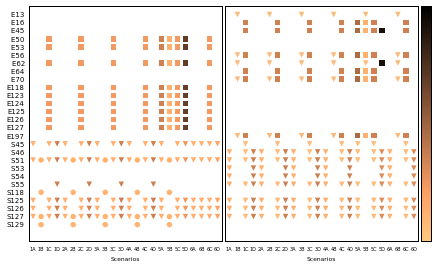

In [6]:
## Plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

my_cmap = 'copper_r'

def make_ticklabels_invisible(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        for tl in ax.get_xticklabels() + ax.get_yticklabels():
            tl.set_visible(False)
            
fig = plt.figure(1,(7.2,7.2/48*28))

gs = gridspec.GridSpec(1, 2,
                       width_ratios=[1,1],
                       #height_ratios=[1,1],
                       wspace=0.02,
                       hspace=0.1,
                       left = 0.18,
                       right=0.93
                       )

#my_cmap = matplotlib.cm.get_cmap('Reds')

plt_num = 0

for p in products:
    ax = plt.subplot(gs[:,plt_num])
    ax.tick_params(labelsize=5, pad = 5, left='off', right='off',top='off', bottom='off',labelbottom='on', labelleft='off',labeltop='off')
    
    if plt_num == 0:
        ax.tick_params(labelleft='on')
        ax.set_yticks(range(0,len(y_labels)))
        ax.set_yticklabels(y_labels, fontsize=7)

    ax.set_xticks(range(0,len(x_labels)))
    ax.set_xticklabels(x_labels)
    ax.set_xlabel('Scenarios', fontsize=6)

    # create scatter plot
    xgrid = {}
    ygrid = {}
    cgrid = {}
    
    xgrid['o'] = []
    xgrid['v'] = []
    xgrid['s'] = []
    ygrid['o'] = []
    ygrid['v'] = []
    ygrid['s'] = []
    cgrid['o'] = []
    cgrid['v'] = []
    cgrid['s'] = []
    
    
    for y, y_ in enumerate(on_off[p]):
        for x, d in enumerate(on_off[p][y]):
            if d:
                xgrid[marker[p][y][x]].append(x)
                ygrid[marker[p][y][x]].append(y)
                if y >= 15:
                    cgrid[marker[p][y][x]].append(d)
                else:
                    cgrid[marker[p][y][x]].append(d)
                    
    for m in ['o','v','s']:
        SP = ax.scatter(xgrid[m], ygrid[m], c = cgrid[m], marker = m, s = 30,  edgecolors='none', vmin = 0, vmax = .8, cmap=my_cmap)
    
    ax.set_ylim(-1, 28)
    ax.set_xlim(-0.5, 23.5)
    ax.invert_yaxis()
    plt_num += 1
    
#colorbars 
from numpy import arange, outer, ones
clist = outer(arange(0,1,0.01),ones(10)) 
axC = fig.add_axes([0.936, 0.125, 0.02, 0.775])
cbar = axC.imshow(clist,aspect='auto',cmap=my_cmap,origin="lower")
axC.tick_params(labelsize=5, pad = 5, left='off', right='off',top='off', bottom='off',labelright ='off', labelbottom='off', labelleft='off',labeltop='off')
#axC.set_ylabel('Growth Rate [1/hr]', fontsize=5)
axC.yaxis.set_label_position("right")
#axC.set_yticks([0, 100])
#axC.set_yticklabels([0.0, 0.8])
 
plt.savefig('figures/active_reactions_per_scenarios.png', dpi=300)
plt.savefig('figures/active_reactions_per_scenarios.svg', dpi=300)

In [7]:
xgrid['o'] = []
xgrid['v'] = xgrid['s'] = []


In [8]:
xgrid['v'].append(1)

In [9]:
xgrid

{'o': [], 's': [1], 'v': [1]}